<a href="https://colab.research.google.com/github/jrad9921/Data-Analysis/blob/main/Gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Libraries



In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Import the Data as df

In [ ]:
df = pd.read_csv('gold.csv')

Data Exploration

In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
df.shape

(2290, 6)

In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

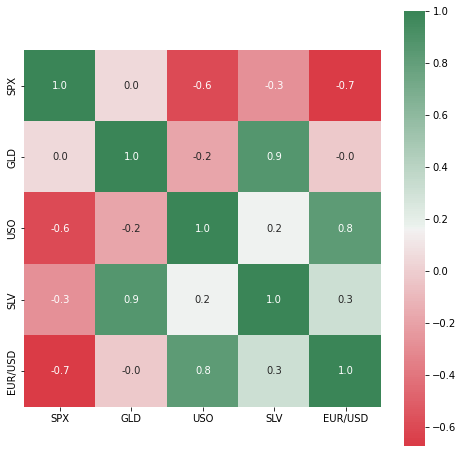

In [ ]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True, square = True, fmt = '.1f', annot=True, cmap = sns.diverging_palette(10,500,n=200))


In [ ]:
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


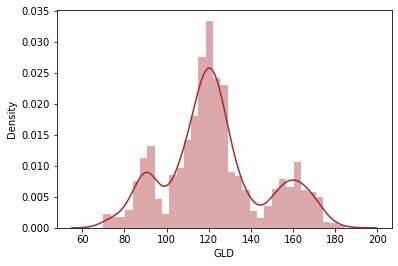

In [ ]:
#Check the distribution of Gold prices
sns.distplot(df['GLD'], color='brown')

Splitting the input from the output for prediction

In [ ]:
x = df.drop(['Date', 'GLD'], axis=1)
y = df['GLD']

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training and Testing Data

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape, xtrain.shape, xtest.shape)

(2290, 4) (1832, 4) (458, 4)


In [ ]:
print(y.shape, ytrain.shape, ytest.shape)

(2290,) (1832,) (458,)


Model Training: Random Forest

In [ ]:
model = RandomForestRegressor(n_estimators=100)

In [ ]:
model.fit(xtrain,ytrain)

RandomForestRegressor()

Model Evaluation

In [ ]:
#prediction on Test Data
test_prediction = model.predict(xtest)
print(test_prediction)

[168.7174994   82.09829977 116.06650024 127.56790058 120.8173013
 154.71149731 150.34509866 126.19300016 117.39489853 125.95430115
 116.64450089 172.20110089 141.32839877 167.88469859 115.24390022
 117.65940041 137.84020293 169.58830026 159.91990215 160.19009909
 155.14029992 125.42950027 176.32729942 156.63360324 125.25570056
  93.80969995  78.1591004  120.5912001  119.05709953 167.55889968
  88.2838006  124.94950011  90.99330061 117.4929003  121.07469952
 136.0765003  115.4908013  115.35650072 144.9720999  107.15820107
 104.18780236  87.218298   126.41980073 117.8081     152.86289902
 119.7336     108.50319964 108.0217979   93.15770013 127.17219775
  74.7320007  113.66159893 121.26580006 111.31429922 118.75569878
 120.69639944 159.41430061 167.5165001  147.22419691  85.96219868
  94.23710068  86.87399893  90.46980025 118.83110073 126.49940075
 127.45469957 167.64819959 122.26959948 117.36929919  98.71000008
 168.58190088 143.16839851 132.22160232 121.28450178 121.64079938
 119.467600

In [ ]:
#R squared error
error_score = metrics.r2_score(ytest, test_prediction)
print('R squared error is: ', error_score)

R squared error is:  0.9900079647032399


Compare the Actual and Predicted values

In [ ]:
ytest=list(ytest)

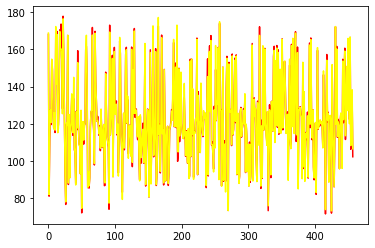

In [ ]:
plt.plot(ytest, color='Red', label='Actual Value')
plt.plot(test_prediction, color = 'Yellow', label = 'Predicted Value')
